In [215]:
#呼叫所需套件
import pandas as pd
import numpy as np
import glob
import os
from scipy import stats

In [216]:
type = ['Semi-Conductor 202211', 'Finance 202211', 'Shipping  202211']
path = os.getcwd() + '\\data\\total\\'
print(path)

# loop over the list of xlsx files
# 0 = Semi-Conductor, 1 = Finance, 2 = Shipping
# sample_data = glob.glob(os.path.join(path, "*.xlsx"))
# print("sample_data: ",sample_data)
# for f in sample_data:
#   df = pd.read_xlsx(f)


d:\USER\Documents\#tmp\python\python-webstorm-TEJ-Banking-and-Finance\data\total\


In [217]:
# 呼叫xlsx檔
timeType = ['日','周', '月', '季', '年']
# data2801 = pd.read_excel("path[]hw2_TEJ_excel.xlsx",sheet_name="2357華碩")
# data2498 = pd.read_excel("hw2_TEJ_excel.xlsx",sheet_name="2498宏達電")
# data9999 = pd.read_excel("hw2_TEJ_excel.xlsx",sheet_name="Y9999加權指數")
# file_list = ["2603.xlsx", "2607.xlsx", "2608.xlsx", "2642.xlsx", "5607.xlsx"]
file_list = ["2603"+timeType[2]+ ".xlsx", "2607"+timeType[2]+".xlsx", "2608"+timeType[2]+".xlsx", "2642"+timeType[2]+".xlsx", "5607"+timeType[2]+".xlsx"]
list = ["2603", "2607", "2608", "2642", "5607"]
data = [pd.read_excel(os.path.join(path, xlsx_filename)) for xlsx_filename in file_list]

In [218]:
# # Create three stock RETURN
# data2357['RETURN']=np.log(data2357.CLOSE) - np.log(data2357.CLOSE.shift(1))
# data2498['RETURN']=np.log(data2498.CLOSE) - np.log(data2498.CLOSE.shift(1))
# data9999['RETURN']=np.log(data9999.CLOSE) - np.log(data9999.CLOSE.shift(1))
column_name = "收盤價(元)"
# print(data[2])
# data[4]['RETURN']=np.log(data[4].loc[:, column_name]) - np.log(data[4].loc[:, column_name].shift(1))
for i in data:
  i['RETURN']=np.log(i.loc[:, column_name]) - np.log(i.loc[:, column_name].shift(1))
  
print(data)
# print(data[0]['RETURN'])

[          年月  開盤價(元)  最高價(元)  最低價(元)  收盤價(元)  成交量(百萬股)_月  成交值(百萬元)_月   報酬率％_月  \
0    2022/12   165.5   172.0   148.5   162.5         578       93147  -0.3068   
1    2022/11   138.0   165.0   131.5   163.0         751      112656  18.5454   
2    2022/10   146.0   158.5   132.0   137.5         940      136341  -5.8219   
3    2022/09    87.2   186.0    78.5   146.0         921      121937 -27.9916   
4    2022/08    95.9   106.5    85.5    88.3        1698      165174  -7.5392   
..       ...     ...     ...     ...     ...         ...         ...      ...   
226  2004/02    34.6    37.2    33.2    36.4         247        8678   5.2024   
227  2004/01    29.2    35.0    29.2    34.6         246        7951  16.8919   
228  2003/12    27.4    30.6    26.5    29.6         239        6904   7.2464   
229  2003/11    30.0    32.3    27.4    27.6         177        5233  -7.3827   
230  2003/10    26.5    30.9    25.9    29.8         381       11076  11.1939   

      週轉率％_月  流通在外股數(千股)  

# Descriptive Statistics

In [219]:

# print(data[0].loc[:, "收盤價(元)"])
# print(data[0].loc[:, "收盤價(元)"].rolling(3).mean())
print(data[0].loc[:, "收盤價(元)"].groupby(data[0].index // 3).mean())

0     154.333333
1     109.933333
2     123.366667
3     130.500000
4     122.166667
         ...    
72     30.433333
73     29.733333
74     26.733333
75     34.766667
76     29.000000
Name: 收盤價(元), Length: 77, dtype: float64


In [220]:
def descriptive_statistics(x) : 
    return pd.Series([x.mean(),x.median(),x.std(),x.var(),
                      x.kurt(),x.skew(),x.min(),x.max(),x.sum(),
                      x.count(),x.quantile(.25), x.quantile(.75)],index=['mean','median',
                      'std','var','kurtosis','skewness','min','max','sum',
                      'count','25%','75%'])
result = []
result_description =  []

for idx in range(len(data)):
  # for semiannual and half year
  result.append(pd.DataFrame(data[idx].loc[:, 'RETURN'].groupby(data[idx].index // 6).mean(),columns=['RETURN']))
  
  # for normal data
  # result.append(pd.DataFrame(data[idx], columns=['RETURN']))
  
  result_description.append(result[idx].apply(descriptive_statistics))

result = pd.concat(result, axis = 1)
result_description = pd.concat(result_description, axis = 1)

result.columns =  list
result_description.columns =  list
result.to_excel("semiannual_return.xlsx")
result_description.to_excel("semiannual_description.xlsx")

# 常見的圖形繪製
# (1)直方圖

In [221]:
#呼叫畫圖的套件，利用matplotlib的pyplot.bar功能
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

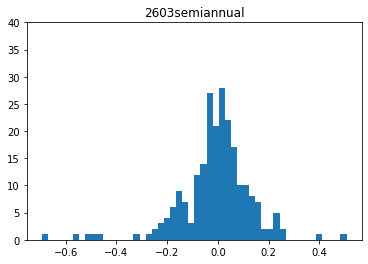

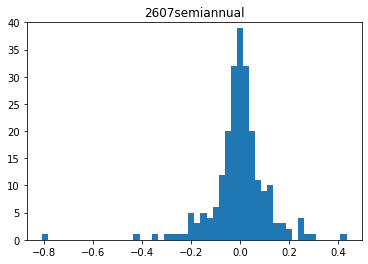

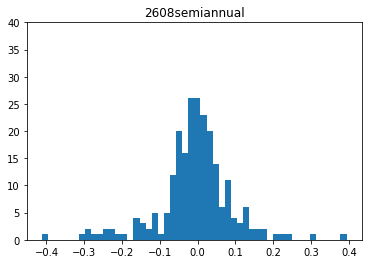

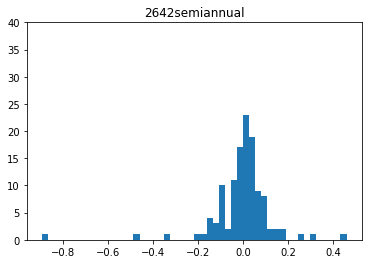

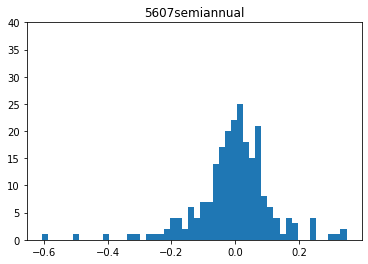

<Figure size 432x288 with 0 Axes>

In [224]:
#第一種直方圖 #單一圖形
unit = "semiannual"
for idx in  range(len(data)):
  plt.hist(data[idx].RETURN, bins= 50)
  # plt.xlim(-0.01,0.01)
  plt.ylim(0,40)
  plt.title(list[idx] + unit)
  plt.savefig("./" + list[idx]+ unit +".png")
  plt.show()
  plt.clf()
  # plt.gca().xaxis.set_major_locator(0.01)
#bins代表直方圖分佈區間個數，range用於設定直方圖的小矩形最大值與最小值

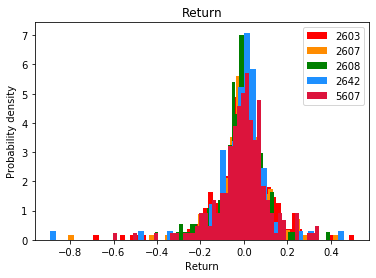

In [223]:
#第三種直方圖 
# plt.hist(result['2357'],bins=50, density=True,label='2357ASUS return',color='r')
# plt.hist(result['2498'],bins=50, density=True,label='2498HTC return',color='g')
# plt.hist(result['9999'],bins=50, density=True,label='9999 return',color='b')
colorType = ['red','darkorange', 'g', 'dodgerblue','crimson']
# print(data[0].RETURN)
for idx in range(len(data)):
  plt.hist(data[idx].RETURN, bins=50, density=True, label=list[idx],color = colorType[idx])
  # plt.xlim(-0.3,0.3)

plt.legend()
plt.xlabel('Return')
plt.ylabel('Probability density')
plt.title("Return")
plt.savefig("./" + unit +".png")